# ANOVA  - Lab

## Introduction

In this lab, you'll get some brief practice generating an ANOVA table (AOV) and interpreting its output. You'll also perform some investigations to compare the method to the t-tests you previously employed to conduct hypothesis testing.

## Objectives

In this lab you will: 

- Use ANOVA for testing multiple pairwise comparisons 
- Interpret results of an ANOVA and compare them to a t-test

## Load the data

Start by loading in the data stored in the file `'ToothGrowth.csv'`: 

In [7]:
# Your code here
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
%matplotlib inline

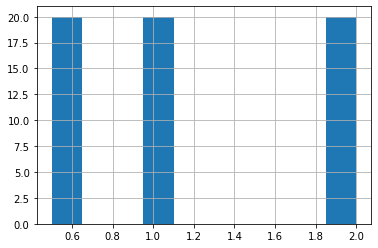

In [2]:
df = pd.read_csv('ToothGrowth.csv')
df.dose.hist()

## Generate the ANOVA table

Now generate an ANOVA table in order to analyze the influence of the medication and dosage:  

In [4]:
formula = 'len ~ C(supp) + C(dose)'
lm = ols(formula, df).fit()
anova = sm.stats.anova_lm(lm, typ=2)
anova

,sum_sq,df,F,PR(>F)
C(supp),205.350000,1.0,14.016638,4.292793e-04
C(dose),2426.434333,2.0,82.810935,1.871163e-17
Residual,820.425000,56.0,NaN,NaN


## Interpret the output

Make a brief comment regarding the statistics and the effect of supplement and dosage on tooth length: 

In [ ]:
# Your comment here
# both supp and dose appear to have an impact on length.

## Compare to t-tests

Now that you've had a chance to generate an ANOVA table, its interesting to compare the results to those from the t-tests you were working with earlier. With that, start by breaking the data into two samples: those given the OJ supplement, and those given the VC supplement. Afterward, you'll conduct a t-test to compare the tooth length of these two different samples: 

In [5]:
oj_df = df.loc[df.supp == 'OJ']
vc_df = df.loc[df.supp == 'VC']

Now run a t-test between these two groups and print the associated two-sided p-value: 

In [10]:
# Calculate the 2-sided p-value for a t-test comparing the two supplement groups
stats.ttest_ind(oj_df.len, vc_df.len, equal_var=False)

Ttest_indResult(statistic=1.91526826869527, pvalue=0.06063450788093387)

## A 2-Category ANOVA F-test is equivalent to a 2-tailed t-test!

Now, recalculate an ANOVA F-test with only the supplement variable. An ANOVA F-test between two categories is the same as performing a 2-tailed t-test! So, the p-value in the table should be identical to your calculation above.

> Note: there may be a small fractional difference (>0.001) between the two values due to a rounding error between implementations. 

In [14]:
# Your code here; conduct an ANOVA F-test of the oj and vc supplement groups.
# Compare the p-value to that of the t-test above. 
# They should match (there may be a tiny fractional difference due to rounding errors in varying implementations)

formula = "len ~ C(supp)"
lm = ols(formula, df.loc[:, ['len', 'supp']]).fit()
anova = sm.stats.anova_lm(lm, typ=2)
anova

,sum_sq,df,F,PR(>F)
C(supp),205.350000,1.0,3.668253,0.060393
Residual,3246.859333,58.0,NaN,NaN


## Run multiple t-tests

While the 2-category ANOVA test is identical to a 2-tailed t-test, performing multiple t-tests leads to the multiple comparisons problem. To investigate this, look at the various sample groups you could create from the 2 features: 

In [15]:
for group in df.groupby(['supp', 'dose'])['len']:
    group_name = group[0]
    data = group[1]
    print(group_name)

('OJ', 0.5)
('OJ', 1.0)
('OJ', 2.0)
('VC', 0.5)
('VC', 1.0)
('VC', 2.0)


While bad practice, examine the effects of calculating multiple t-tests with the various combinations of these. To do this, generate all combinations of the above groups. For each pairwise combination, calculate the p-value of a 2-sided t-test. Print the group combinations and their associated p-value for the two-sided t-test.

In [45]:
# Your code here; reuse your t-test code above to calculate the p-value for a 2-sided t-test
# for all combinations of the supplement-dose groups listed above. 
# (Since there isn't a control group, compare each group to every other group.)

grouped = df.groupby(['supp', 'dose'])['len'].apply(list)

# groups=[]
# data=[]
# for group in grouped:
#     groups.append(group[0])
#     data.append(group[1])

[15.2, 21.5, 17.6, 9.7, 14.5, 10.0, 8.2, 9.4, 16.5, 9.7]

In [56]:
import itertools

combs = list(itertools.combinations(grouped.index, 2))

In [87]:
tcombs = []
ttests = []
for i in combs:
    tcombs.append(i)
    sample1 = grouped[i[0]]
    sample2 = grouped[i[1]]
    ttests.append(round(stats.ttest_ind(sample1, sample2, equal_var=False)[1], 4))

In [88]:
for i in range(len(tcombs)):
    print(tcombs[i], ttests[i])

(('OJ', 0.5), ('OJ', 1.0)) 0.0001
(('OJ', 0.5), ('OJ', 2.0)) 0.0
(('OJ', 0.5), ('VC', 0.5)) 0.0064
(('OJ', 0.5), ('VC', 1.0)) 0.046
(('OJ', 0.5), ('VC', 2.0)) 0.0
(('OJ', 1.0), ('OJ', 2.0)) 0.0392
(('OJ', 1.0), ('VC', 0.5)) 0.0
(('OJ', 1.0), ('VC', 1.0)) 0.001
(('OJ', 1.0), ('VC', 2.0)) 0.0965
(('OJ', 2.0), ('VC', 0.5)) 0.0
(('OJ', 2.0), ('VC', 1.0)) 0.0
(('OJ', 2.0), ('VC', 2.0)) 0.9639
(('VC', 0.5), ('VC', 1.0)) 0.0
(('VC', 0.5), ('VC', 2.0)) 0.0
(('VC', 1.0), ('VC', 2.0)) 0.0001


## Summary

In this lesson, you implemented the ANOVA technique to generalize testing methods to multiple groups and factors.